In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


### Read out address data and price data from csv

In [7]:
df = pd.read_csv('./housing/USA_Housing.csv')

# area_income = df.loc[:, ['']]
# area_income = area_income.values
# area_income = area_income[~np.isnan(area_income)]

housing_price = df.loc[:, ['Estimate!!Median value (dollars)']]
housing_price = housing_price.values
housing_price = housing_price[~np.isnan(housing_price)]

address = df.loc[:, ['Geographic Area Name']]
address = address.values

# address = address.tolist()


### split address into city, state, and postal code

In [27]:
counties = []
states = []


for addr in address:
    addr = addr[0]
    if addr.find(', ') != -1 :
        [county, state] = addr.split(', ', 2)
        
    counties.append(county)
    states.append(state)


In [17]:
state_counts = Counter(states)
state_names = list(state_counts.keys())
state_names.sort()

counts = list(state_counts.values())

print('There are ', len(state_names), ' states.')
print(state_counts.keys())

There are  52  states.
dict_keys(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'])


In [18]:
states_dont_care = ['Puerto Rico']

There are  51  states.


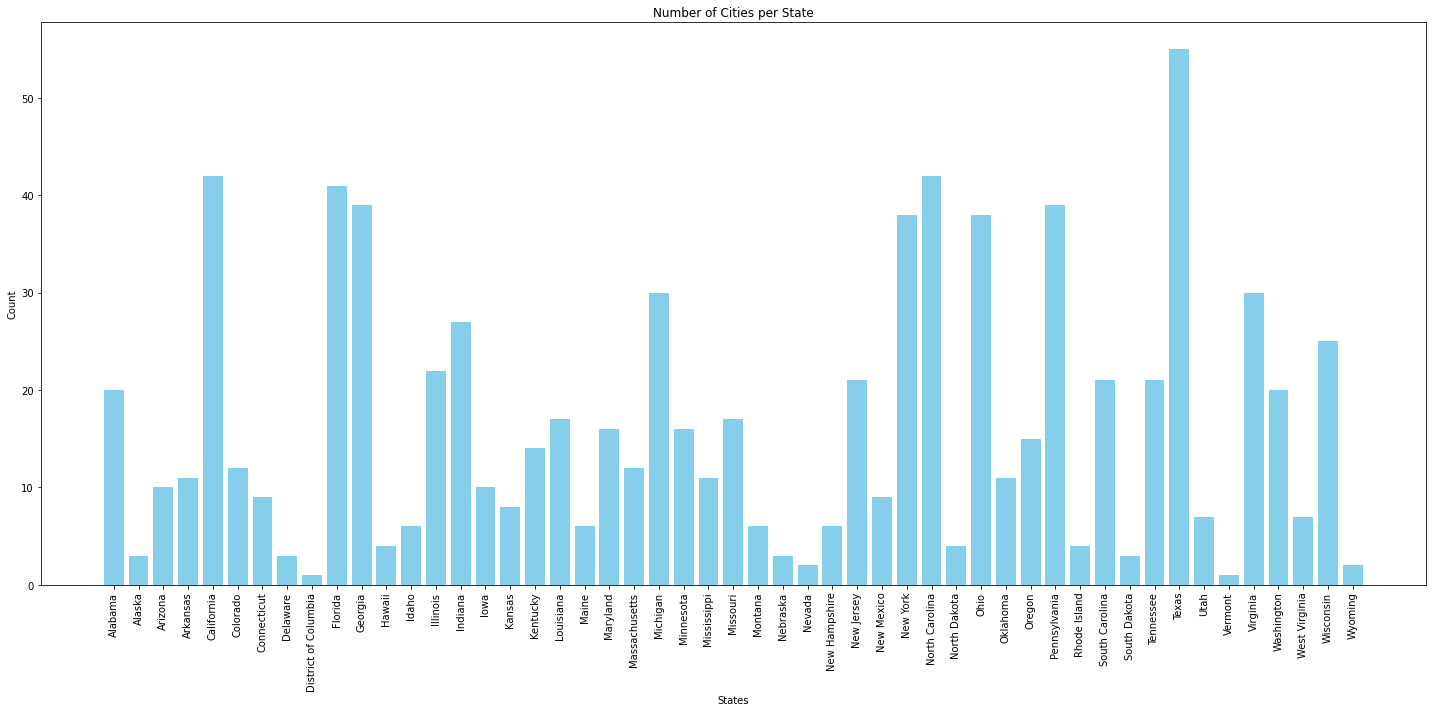

In [25]:
indices_to_keep = [i for i, j in enumerate(states) if j not in states_dont_care]

# Extract housing prices & income based on these indices
filtered_prices = [housing_price[idx] for idx in indices_to_keep]

# Filter the states based on the states_to_keep
filtered_states = [states[idx] for idx in indices_to_keep]
state_counts = Counter(filtered_states)

# Extract states and their counts for plotting
state_names = list(state_counts.keys())
state_names.sort()

counts = list(state_counts.values())

print('There are ', len(state_names), ' states.')

# Plotting the histogram
plt.figure(figsize=(20, 10))
plt.bar(state_names, counts, color='skyblue')
plt.xlabel('States')
plt.ylabel('Count')
plt.title('Number of Cities per State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [32]:
states_to_keep = state_names

In [ ]:
# Define column names
columns = ['State', 'County', 'Medain of income']

# Create a DataFrame with specified column names
data = {
    'State': states,
    'County': counties,
    'Medain of income': list3
}

df = pd.DataFrame(data, columns=columns)

# Save DataFrame to a CSV file
df.to_csv('data_with_columns.csv', index=False)  # Change 'data_with_columns.csv' to your desired filename

### Mean & Variance

Whole USA Housing price, each data point represent a county

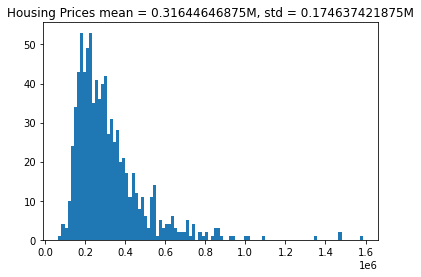

In [26]:
filtered_prices = np.array(filtered_prices, dtype=np.float32)
price_mean = np.mean(filtered_prices)
price_std = np.std(filtered_prices)
# "1 + 1 = %i" % num 
plt.title('Housing Prices mean = ' +str(price_mean/10**6) + 'M, std = ' + str(price_std/10**6) + 'M')
plt.hist(filtered_prices, bins = 100)
plt.show()

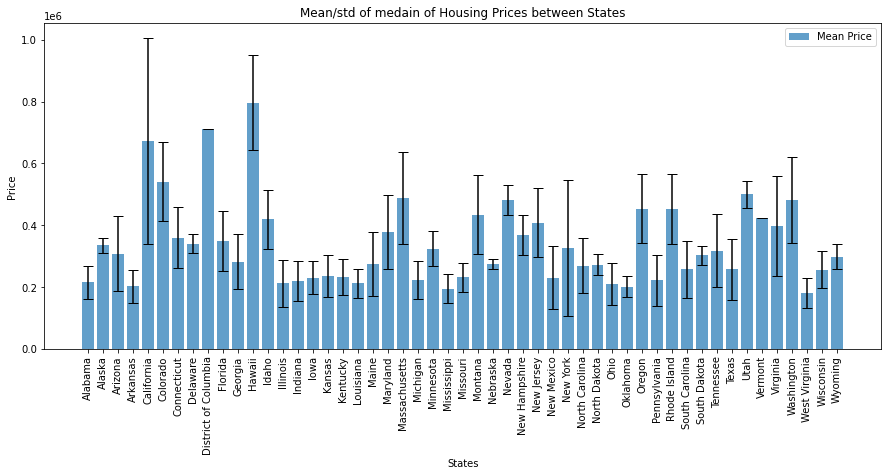

In [35]:
# Calculate mean and variance of housing prices for each state
# Create a dictionary to store prices for each state
state_price_dict = {state: [] for state in states_to_keep}



# Group prices by state
for i, state in enumerate(states):
#     print(state_price_dict[state])
    if state in states_to_keep:
        state_price_dict[state].append(housing_price[i])

# Calculate mean and variance for each state
state_means = [np.mean(prices) for state, prices in state_price_dict.items()]
state_std = [np.std(prices) for state, prices in state_price_dict.items()]

# Plotting mean and variance
plt.figure(figsize=(15, 6))

plt.bar(state_price_dict.keys(), state_means, yerr=state_std, capsize=5, alpha=0.7, label='Mean Price')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Price')
plt.title('Mean/std of medain of Housing Prices between States')
plt.legend()
# plt.ylim([0.7*10**6, 1.8*10**6])

plt.show()